Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

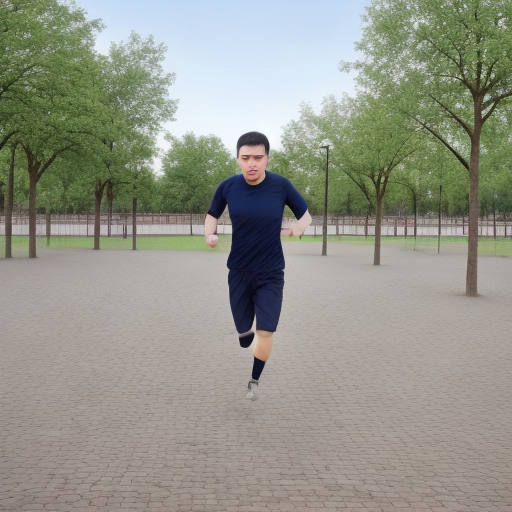

In [7]:
import sys
sys.path.append("../")
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch
from lora_diffusion import tune_lora_scale, patch_pipe

model_id = "stabilityai/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a <s1>|<s2> man is running on the playground"
patch_pipe(
    pipe,
    "../training_scripts/output_dreambooth/lora_weight.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 1.0)
tune_lora_scale(pipe.text_encoder, 1.00)

torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image